In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from nsdmd import utils
from nsdmd import nsdmd

In [2]:
t_step = 0.001
f1 = 17
t1 = np.arange(0,2000)
phi_1 = np.ones((100,len(t1)))
phi_1[:50] = phi_1[:50] * np.linspace(1,4,len(t1))
phi_1[50:] = phi_1[50] * np.linspace(4,1,len(t1))
f2 = 30
t2 = np.arange(0,2000)
phi_2 = np.ones((100,len(t2)))
phi_2[:50] = phi_2[:50] * np.linspace(3,2,len(t2))
phi_2[50:] = phi_2[50] * np.linspace(1,4,len(t2))

net1, F1_true, _ = utils.make_network(f1, len(t1), \
                   phi_1, \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-30,30,10)]]))
net2, F2_true, _ = utils.make_network(f2, len(t2), \
                   phi_2, \
                   np.hstack([i*np.ones(10, dtype=int) for i in [int(j) for j in np.linspace(-10,50,10)]]))
x = np.zeros((100,2000))
x[:,t1] += net1
x[:,t2] += net2
x = utils.add_noise(x, std=0.1)
t = np.arange(x.shape[1]) * t_step

Text(0, 0.5, 'Channel')

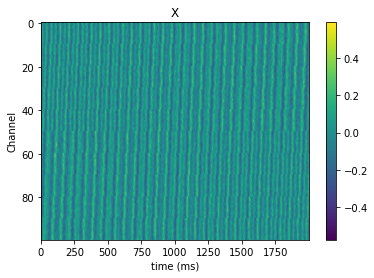

In [3]:
plt.imshow(x, aspect='auto')
plt.colorbar()
plt.title('X')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0.5, 1.0, 'Phi Amp: 17 Hz')

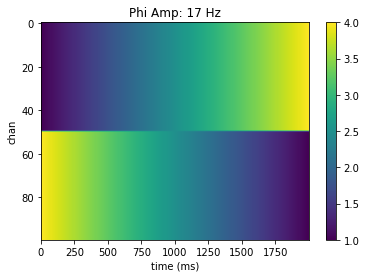

In [4]:
plt.imshow(phi_1, aspect='auto')
plt.colorbar()
plt.ylabel('chan')
plt.xlabel('time (ms)')
plt.title('Phi Amp: '+str(f1)+' Hz')

Text(0.5, 1.0, 'Phi Amp: 30 Hz')

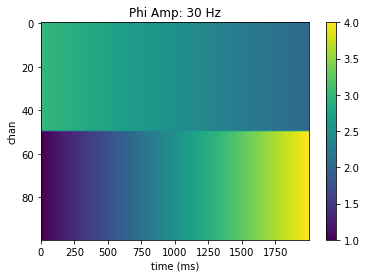

In [5]:
plt.imshow(phi_2, aspect='auto')
plt.colorbar()
plt.ylabel('chan')
plt.xlabel('time (ms)')
plt.title('Phi Amp: '+str(f2)+' Hz')

In [16]:
model = nsdmd.NSDMD(opt_rank=4, sim_thresh_phi_amp=0.999, verbose=True)
model.fit_opt(x, t)

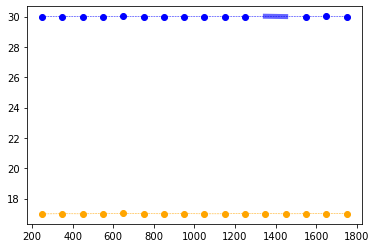

In [17]:
group_idx = nsdmd.group_by_similarity(model.freqs_, model.phis_, \
                                      model.sim_thresh_freq, model.sim_thresh_phi_amp)

x_extent = np.mean(model.windows_, axis=1)
colors = ['blue', 'orange']
for i in range(0,len(group_idx),2):
    plt.plot(x_extent, model.freqs_[:,i], linestyle='dashed', color=colors[i//2], linewidth=0.5)
    for g in group_idx[i]:
        if(len(g)>1):
            plt.plot(x_extent[g], model.freqs_[g,i], color=colors[i//2], linewidth=5, alpha=0.6)
        else:
            plt.scatter(x_extent[g], model.freqs_[g,i], color=colors[i//2])

In [18]:
model.fit_reduction(x, t)

0/31
1/31
2/31
3/31
4/31
5/31
6/31
7/31
8/31
9/31
10/31
11/31
12/31
13/31
14/31
15/31
16/31
17/31
18/31
19/31
20/31
21/31
22/31
23/31
24/31
25/31
26/31
27/31
28/31
29/31
30/31


Text(0, 0.5, 'Cosine Distance')

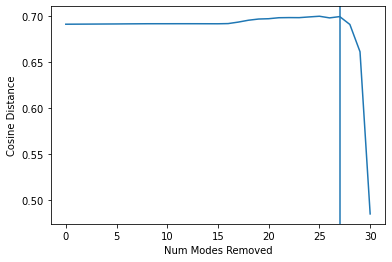

In [20]:
plt.plot(model.errors_)
plt.axvline(27)
plt.xlabel('Num Modes Removed')
plt.ylabel('Cosine Distance')

In [23]:
model.fit_f(x, t, t_step, 25)

/tmp/ipykernel_2762/422705195.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + alpha)


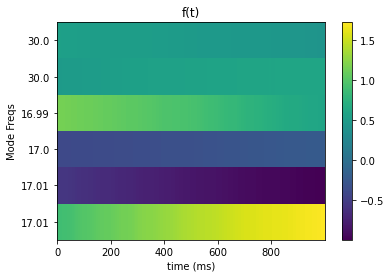

In [24]:
alpha = [str(np.round(f,2)) for f in model.freq_hat_]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[:,500:-500], aspect='auto')
fig.colorbar(cax)
ax.set_yticklabels([''] + alpha)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t)')
plt.xlabel('time (ms)')
plt.ylabel('Mode Freqs')
plt.show()

In [25]:
model.fit_f(x, t, t_step, 27)

/tmp/ipykernel_2762/422705195.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + alpha)


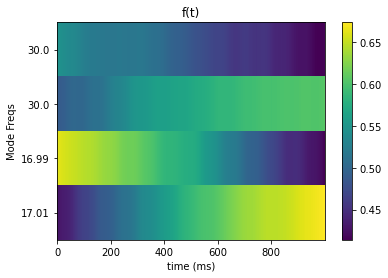

In [26]:
alpha = [str(np.round(f,2)) for f in model.freq_hat_]
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(model.f_hat_[:,500:-500], aspect='auto')
fig.colorbar(cax)
ax.set_yticklabels([''] + alpha)
ax.xaxis.set_ticks_position('bottom')
plt.title('f(t)')
plt.xlabel('time (ms)')
plt.ylabel('Mode Freqs')
plt.show()

In [ ]:
plt.matshow(np.abs(model.phis_hat_[0]).T, aspect='auto')
plt.colorbar()

In [27]:
x_rec = model.transform(x, t)

Text(0, 0.5, 'Channel')

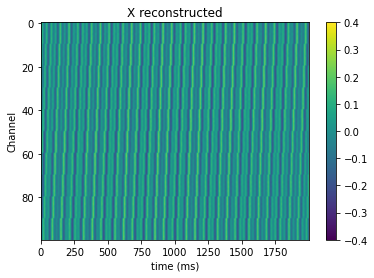

In [28]:
plt.imshow(x_rec, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X reconstructed')
plt.xlabel('time (ms)')
plt.ylabel('Channel')

Text(0, 0.5, 'Channel')

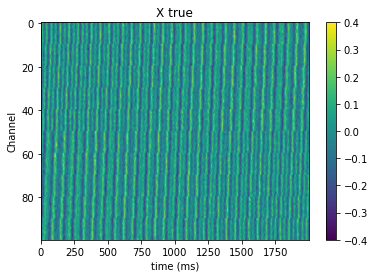

In [29]:
plt.imshow(x, aspect='auto', vmin=-0.4, vmax=0.4)
plt.colorbar()
plt.title('X true')
plt.xlabel('time (ms)')
plt.ylabel('Channel')